## Python ML Project 3 Linear Regression Insurance Prediction

Project Description:
In this particular project, we are using the insurance.csv dataset that contains
information like age, sex, bmi, children, smoker, region, charges etc. and using
that to predict insurance charges.

In addition, try various tricks and techniques in order to gain the best accuracy
in your predictions.
Column Details:
1. age: self-explanatory
2. sex: male or female
3. bmi: body mass index
4. children: number of children the person has
5. smoker: Yes/No
6. region: self-explanatory
7. charges: self-explanatory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
cd D:\Data Science\Project\P3

D:\Data Science\Project\P3


In [3]:
df=pd.read_csv("Python_Linear_Regres.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
#df=df.drop(df['region'],axis=1,inplace=Ture)

## Part-1: Data Exploration and Pre-processing

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df['children'].unique()
# in this columns no null value

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [25]:
# in this columns no null value

Text(0.5, 1.0, 'Age vs Number Of Children')

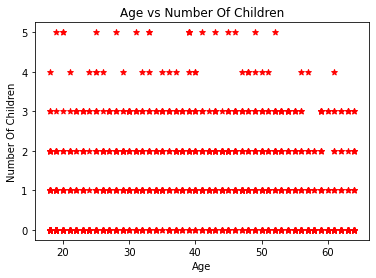

In [26]:
plt.scatter(df['age'],df['children'],marker='*',color='red')
plt.xlabel("Age")
plt.ylabel("Number Of Children")
plt.title("Age vs Number Of Children")

In [27]:
bmi=df['bmi'].astype(int)

<BarContainer object of 1338 artists>

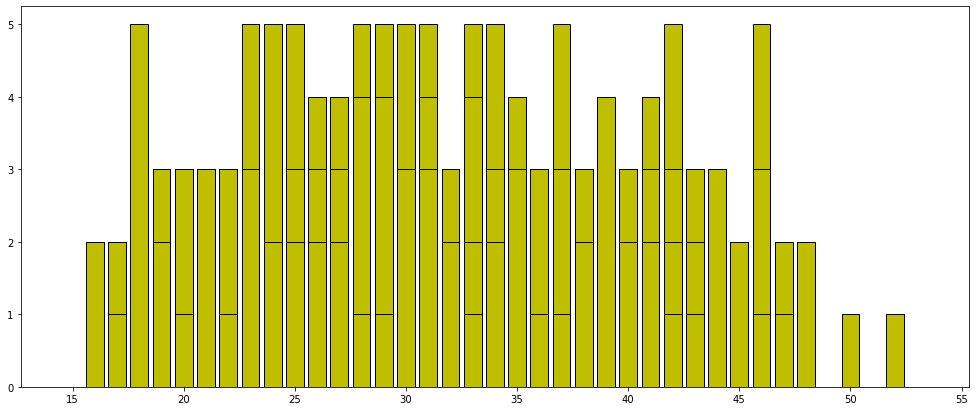

In [28]:
plt.figure(figsize=(17,7))
plt.bar(bmi,df['children'],edgecolor="black",color="y")

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
labelencode=LabelEncoder()

In [31]:
df[['sex','smoker','region']]=df[['sex','smoker','region']].apply(labelencode.fit_transform)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [32]:
#df['bmi']=df['bmi'].astype(int)

In [33]:
#df['charges']=df['charges'].astype(int)

In [34]:
#df['age'].unique()

In [35]:
#df['bmi'].unique()

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [37]:
df[['age','bmi','charges']]= minmax.fit_transform(df[['age','bmi','charges']])

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


## Part-2: Working with Models

In [39]:
feature_data=df.drop('charges' ,axis='columns')
feature_data.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,3
1,0.000000,1,0.479150,1,0,2
2,0.217391,1,0.458434,3,0,2
3,0.326087,1,0.181464,0,0,1
4,0.304348,1,0.347592,0,0,1


In [40]:
target_data=df['charges']
target_data.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_data,target_data,test_size=0.2,random_state=42)

In [64]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,0.608696,0,0.107345,2,0,1
1285,0.630435,0,0.224913,0,0,0
1142,0.739130,0,0.239440,0,0,2
969,0.456522,0,0.493947,5,0,2
486,0.782609,0,0.148238,3,0,1


In [65]:
y_train.head()

560     0.128845
1285    0.118324
1142    0.414952
969     0.119316
486     0.181225
Name: charges, dtype: float64

In [66]:
x_test.head()

,age,sex,bmi,children,smoker,region
764,0.586957,0,0.247915,2,0,0
887,0.391304,0,0.378262,0,0,1
890,1.000000,0,0.293920,0,1,1
1293,0.608696,1,0.263250,3,0,1
259,0.021739,1,0.429379,0,1,1


In [67]:
y_test.head()

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
Name: charges, dtype: float64

In [68]:
x_train.shape, x_test.shape 

((1070, 6), (268, 6))

In [69]:
y_train.shape, y_test.shape 

((1070,), (268,))

In [70]:
lin_model=LinearRegression()

In [71]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [72]:
# Training Data Score
lin_model.score(x_train,y_train)

0.7417049283233981

In [73]:
# Testing Data Score
lin_model.score(x_test,y_test)

0.7833463107364538

In [74]:
prct_charges=lin_model.predict(x_test)

In [75]:
print("Slope:",lin_model.coef_)

Slope: [ 1.88744789e-01 -2.99950365e-04  1.99222443e-01  6.78533546e-03
  3.77467899e-01 -4.33025582e-03]


In [76]:
print("Intercept:",lin_model.intercept_)

Intercept: -0.049201376938108915


In [77]:
print("MSE:",mean_squared_error(y_test,prct_charges))

MSE: 0.008569826799446189


In [78]:
print("MAE:",mean_absolute_error(y_test,prct_charges))

MAE: 0.06682530758835466


In [79]:
import numpy as np
rmse=np.math.sqrt(mean_squared_error(y_test,prct_charges))
print('Mean Root squared error: ',rmse)

Mean Root squared error:  0.09257335901568112


In [80]:
y_train

560     0.128845
1285    0.118324
1142    0.414952
969     0.119316
486     0.181225
          ...   
1095    0.054899
1130    0.119084
1294    0.172538
860     0.718159
1126    0.145139
Name: charges, Length: 1070, dtype: float64

In [81]:
prct_charges=lin_model.predict(x_train)
prct_charges

array([0.09631263, 0.11459753, 0.12934703, ..., 0.16401481, 0.57638918,
       0.16403948])

In [82]:
y_test

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
109     0.733196
575     0.177195
535     0.078936
543     1.000000
846     0.139681
Name: charges, Length: 268, dtype: float64

In [83]:
prct_charges=lin_model.predict(x_test)
prct_charges

array([ 1.24544508e-01,  9.56833115e-02,  5.71236482e-01,  1.33857851e-01,
        4.13281304e-01,  1.54335655e-01, -1.42952294e-02,  2.52533236e-01,
       -1.04141439e-03,  1.61951799e-01,  4.29805993e-01,  1.32524836e-01,
        6.71116593e-02,  5.95994382e-01,  6.25417979e-01,  5.75035397e-01,
        2.26119263e-01,  5.56168956e-01,  1.28611131e-01,  4.85070382e-01,
        4.27131451e-02,  1.42843746e-01,  1.90060510e-02,  9.50147959e-02,
        1.63299832e-01,  1.88127197e-01,  2.12725945e-01,  8.11477001e-02,
        1.40388467e-01,  1.78396205e-02,  1.26717702e-01,  1.91523786e-01,
        5.58006993e-02,  3.74476047e-02,  5.23695138e-02,  1.89087240e-01,
        1.28585743e-02,  1.21886997e-01,  5.14017895e-01,  5.03069919e-01,
        4.35851027e-02,  5.18531170e-02,  2.06850525e-01,  1.65315230e-01,
        1.23025784e-01,  1.74373973e-01,  6.70555182e-02,  3.15863303e-02,
        5.49489642e-01,  1.28969266e-01,  2.35797361e-01,  2.04979373e-02,
        1.79982552e-01,  